### Import the data


In [ ]:
  #Publicly Useable File

import pandas as pd

url = 'https://drive.google.com/file/d/1CIrXbPbcNL58C1Pr2mox2tzPx6wCOOuw/view?usp=sharing'
SpotifyFeatures = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(SpotifyFeatures)

In [ ]:
cd /content/drive/MyDrive/DS_Using_Python

[Errno 2] No such file or directory: '/content/drive/MyDrive/DS_Using_Python'
/content


In [ ]:
df_data2 = pd.read_csv('SpotifyData_2.csv')

FileNotFoundError: ignored

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import randint
from scipy.stats import uniform

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### Append the data from two different sources

In [ ]:
df_data2.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [ ]:
df2 = df.sample(n = 100000, random_state = 0)

In [ ]:
# df2 = pd.get_dummies(df2, columns = ['genre'])
# df2.head()

In [ ]:
# Convert categorical values into numbers
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()

# Collect the X-values into X-matrix
X = df2[['genre', 'acousticness', 'danceability', 'duration_ms', 'instrumentalness', 'loudness', 'speechiness']]
#X = df2[['genre', 'duration_ms', 'liveness', 'valence', 'speechiness', 'danceability', 'energy' ]]
#X = df2[['genre', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 
#         'mode', 'speechiness', 'tempo', 'time_signature', 'valence']]
#X = df2[['acousticness', 'danceability', 'duration_ms', 'liveness', 'loudness', 'speechiness', 'valence']]
# Collect y-values
y = df2.popularity



In [ ]:
#X = pd.get_dummies(X, columns = ['genre'])
X['genre'] = class_le.fit_transform(X['genre'])
#X['key'] = class_le.fit_transform(X['key'])
#X['mode'] = class_le.fit_transform(X['mode'])
X['duration_ms'] = X['duration_ms']/(1000*60)
#X['time_signature'] = class_le.fit_transform(X['time_signature'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
X

,genre,acousticness,danceability,duration_ms,instrumentalness,loudness,speechiness
134848,20,0.007920,0.861,2.838250,0.269000,-10.104,0.1430
43959,11,0.259000,0.820,3.428883,0.000000,-12.085,0.0874
135390,20,0.198000,0.791,4.215550,0.000006,-12.167,0.0754
104126,6,0.957000,0.461,2.410667,0.000000,-29.027,0.0798
58631,16,0.982000,0.368,5.343783,0.010500,-13.974,0.0983
...,...,...,...,...,...,...,...
167259,6,0.961000,0.325,6.244217,0.531000,-17.053,0.0365
110017,17,0.360000,0.617,4.030667,0.000088,-4.063,0.0512
103884,5,0.199000,0.376,4.955333,0.000000,-8.081,0.0399
11009,1,0.000021,0.522,3.778217,0.003990,-5.030,0.0617


In [ ]:
# X['genre'] = class_le.fit_transform(X['genre'])
#X['duration_ms'] = X['duration_ms']/(1000*60)

# Split data into train-validate. (Test will be on Kaggle.) 
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)

# X_train_std = X_train;
# X_val_std = X_val;

### Linear regression using OLS 

In [ ]:
import statsmodels.api as sm
result = sm.OLS(y_train, sm.add_constant(X_train_std)).fit()
print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     2505.
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        17:24:09   Log-Likelihood:            -2.9463e+05
No. Observations:               70000   AIC:                         5.893e+05
Df Residuals:                   69992   BIC:                         5.893e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.0759      0.062    667.441      0.0

### Decision tree

In [ ]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
model = DecisionTreeRegressor()
model.fit(X_train_std, y_train)
y_pred = model.predict(X_val_std)
from sklearn.metrics import accuracy_score
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_val, y_pred, squared=False)
print(errors)

Coefficient of determination: -0.09
19.063696530753596


Feature: 0, Score: 0.25144
Feature: 1, Score: 0.11576
Feature: 2, Score: 0.15834
Feature: 3, Score: 0.10650
Feature: 4, Score: 0.12688
Feature: 5, Score: 0.13105
Feature: 6, Score: 0.11003


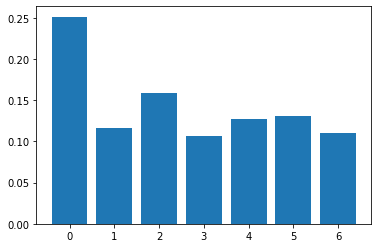

In [ ]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
feat_labels = X.columns

In [ ]:
feat_labels

Index(['acousticness', 'danceability', 'duration_ms', 'liveness', 'loudness',
       'speechiness', 'valence'],
      dtype='object')

In [ ]:
indices = np.argsort(importance)[::-1]

for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importance[indices[f]]))

 1) acousticness                   0.259259
 2) duration_ms                    0.154604
 3) speechiness                    0.130687
 4) danceability                   0.124027
 5) valence                        0.119520
 6) loudness                       0.116339
 7) liveness                       0.095565


### SVR 

In [ ]:
from sklearn.svm import SVR
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split
#svr_rbf = SVR(kernel="rbf", C=150000, gamma=0.004, epsilon=0.1)
svr_rbf = SVR(kernel="rbf", C=10, gamma=0.01, epsilon=0.1)
# svr_lin = SVR(kernel="linear", C=100, gamma="auto")
# svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
svr_rbf.fit(X_train_std, y_train)

SVR(C=10, gamma=0.01)

In [ ]:
y_pred = svr_rbf.predict(X_val_std)
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_val, y_pred, squared=False)
print(errors)
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))

In [ ]:
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}
svr_cv = GridSearchCV(svm.SVR(), param_grid, refit=True,verbose=2)
svr_cv.fit(X_train_std, y_train)
print("SVR GridSearch params: ")
print(svr_cv.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   3.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   3.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   2.9s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   2.8s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   2.8s
[CV] END ........................C=1, gamma=0.01

In [ ]:
# SVR GridSearch params: 
# {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

SyntaxError: ignored